In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DEO
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


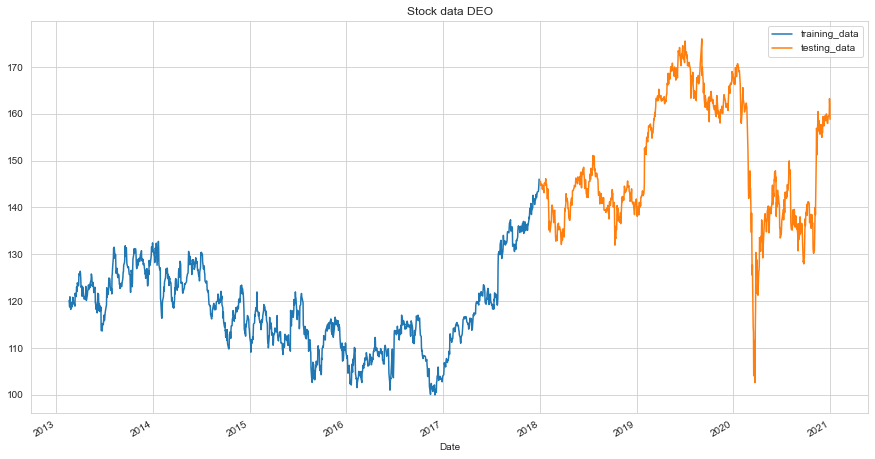

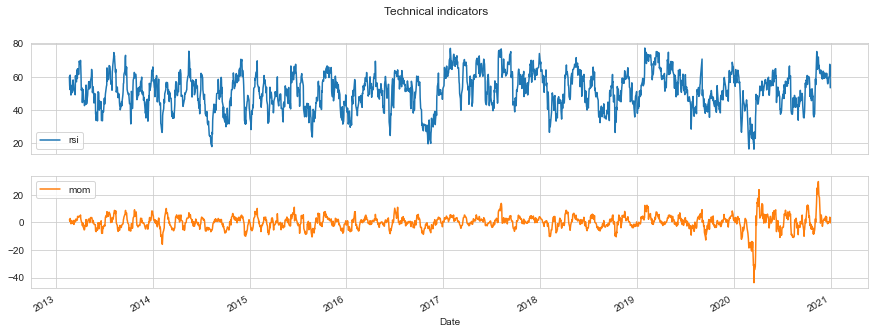

In [2]:
stock_name = 'deo'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1134.39, duration: 0:00:00.299065
episode: 2/2000, episode end value: 1112.05, duration: 0:00:00.232051
episode: 3/2000, episode end value: 1059.84, duration: 0:00:00.284071
episode: 4/2000, episode end value: 1087.84, duration: 0:00:00.291060
episode: 5/2000, episode end value: 1112.66, duration: 0:00:00.256059
episode: 6/2000, episode end value: 1091.18, duration: 0:00:00.253054
episode: 7/2000, episode end value: 1173.26, duration: 0:00:00.267057
episode: 8/2000, episode end value: 1105.18, duration: 0:00:00.242052
episode: 9/2000, episode end value: 1097.78, duration: 0:00:00.250056
episode: 10/2000, episode end value: 1115.80, duration: 0:00:00.264058
episode: 11/2000, episode end value: 1113.55, duration: 0:00:00.250060
episode: 12/2000, episode end value: 1103.27, duration: 0:00:00.264057
episode: 13/2000, episode end value: 1127.10, duration: 0:00:00.301067
episode: 14/2000, episode end value: 1125.15, duration: 0:00:00.269064
episode: 15/200

episode: 117/2000, episode end value: 1144.21, duration: 0:00:00.466103
episode: 118/2000, episode end value: 1129.24, duration: 0:00:00.406092
episode: 119/2000, episode end value: 1136.55, duration: 0:00:00.394088
episode: 120/2000, episode end value: 1140.49, duration: 0:00:00.300073
episode: 121/2000, episode end value: 1119.56, duration: 0:00:00.294062
episode: 122/2000, episode end value: 1118.70, duration: 0:00:00.312073
episode: 123/2000, episode end value: 1131.54, duration: 0:00:00.305067
episode: 124/2000, episode end value: 1117.32, duration: 0:00:00.317072
episode: 125/2000, episode end value: 1119.81, duration: 0:00:00.284065
episode: 126/2000, episode end value: 1146.25, duration: 0:00:00.276060
episode: 127/2000, episode end value: 1129.01, duration: 0:00:00.293067
episode: 128/2000, episode end value: 1133.11, duration: 0:00:00.280062
episode: 129/2000, episode end value: 1115.81, duration: 0:00:00.333075
episode: 130/2000, episode end value: 1114.96, duration: 0:00:00

episode: 231/2000, episode end value: 1097.40, duration: 0:00:00.460102
episode: 232/2000, episode end value: 1151.40, duration: 0:00:00.430100
episode: 233/2000, episode end value: 1138.61, duration: 0:00:00.353079
episode: 234/2000, episode end value: 1129.71, duration: 0:00:00.456102
episode: 235/2000, episode end value: 1110.53, duration: 0:00:00.410091
episode: 236/2000, episode end value: 1102.80, duration: 0:00:00.466104
episode: 237/2000, episode end value: 1106.26, duration: 0:00:00.397095
episode: 238/2000, episode end value: 1134.22, duration: 0:00:00.433092
episode: 239/2000, episode end value: 1107.35, duration: 0:00:00.478107
episode: 240/2000, episode end value: 1136.45, duration: 0:00:00.431095
episode: 241/2000, episode end value: 1122.08, duration: 0:00:00.458101
episode: 242/2000, episode end value: 1120.69, duration: 0:00:00.397088
episode: 243/2000, episode end value: 1095.08, duration: 0:00:00.461103
episode: 244/2000, episode end value: 1105.78, duration: 0:00:00

episode: 345/2000, episode end value: 1138.77, duration: 0:00:00.533119
episode: 346/2000, episode end value: 1143.86, duration: 0:00:00.527123
episode: 347/2000, episode end value: 1128.89, duration: 0:00:00.501110
episode: 348/2000, episode end value: 1166.26, duration: 0:00:00.438098
episode: 349/2000, episode end value: 1154.82, duration: 0:00:00.478107
episode: 350/2000, episode end value: 1165.13, duration: 0:00:00.468105
episode: 351/2000, episode end value: 1146.36, duration: 0:00:00.430098
episode: 352/2000, episode end value: 1180.89, duration: 0:00:00.509113
episode: 353/2000, episode end value: 1158.30, duration: 0:00:00.489116
episode: 354/2000, episode end value: 1171.18, duration: 0:00:00.464106
episode: 355/2000, episode end value: 1159.14, duration: 0:00:00.465102
episode: 356/2000, episode end value: 1163.17, duration: 0:00:00.413097
episode: 357/2000, episode end value: 1171.07, duration: 0:00:00.477102
episode: 358/2000, episode end value: 1144.65, duration: 0:00:00

episode: 459/2000, episode end value: 1156.78, duration: 0:00:00.427099
episode: 460/2000, episode end value: 1156.44, duration: 0:00:00.511114
episode: 461/2000, episode end value: 1145.22, duration: 0:00:00.489109
episode: 462/2000, episode end value: 1149.61, duration: 0:00:00.425099
episode: 463/2000, episode end value: 1141.04, duration: 0:00:00.404091
episode: 464/2000, episode end value: 1138.69, duration: 0:00:00.458103
episode: 465/2000, episode end value: 1142.92, duration: 0:00:00.446099
episode: 466/2000, episode end value: 1144.37, duration: 0:00:00.477112
episode: 467/2000, episode end value: 1157.08, duration: 0:00:00.456099
episode: 468/2000, episode end value: 1171.31, duration: 0:00:00.436101
episode: 469/2000, episode end value: 1154.16, duration: 0:00:00.435097
episode: 470/2000, episode end value: 1159.19, duration: 0:00:00.398089
episode: 471/2000, episode end value: 1163.50, duration: 0:00:00.507117
episode: 472/2000, episode end value: 1134.88, duration: 0:00:00

episode: 573/2000, episode end value: 1169.05, duration: 0:00:00.501109
episode: 574/2000, episode end value: 1156.13, duration: 0:00:00.498113
episode: 575/2000, episode end value: 1126.16, duration: 0:00:00.490106
episode: 576/2000, episode end value: 1136.90, duration: 0:00:00.518116
episode: 577/2000, episode end value: 1136.36, duration: 0:00:00.521118
episode: 578/2000, episode end value: 1167.93, duration: 0:00:00.484111
episode: 579/2000, episode end value: 1154.99, duration: 0:00:00.417091
episode: 580/2000, episode end value: 1152.34, duration: 0:00:00.517116
episode: 581/2000, episode end value: 1144.81, duration: 0:00:00.450097
episode: 582/2000, episode end value: 1159.60, duration: 0:00:00.432098
episode: 583/2000, episode end value: 1122.81, duration: 0:00:00.433095
episode: 584/2000, episode end value: 1132.58, duration: 0:00:00.474107
episode: 585/2000, episode end value: 1166.21, duration: 0:00:00.478110
episode: 586/2000, episode end value: 1161.27, duration: 0:00:00

episode: 687/2000, episode end value: 1153.33, duration: 0:00:00.467103
episode: 688/2000, episode end value: 1153.22, duration: 0:00:00.379085
episode: 689/2000, episode end value: 1115.76, duration: 0:00:00.474106
episode: 690/2000, episode end value: 1209.83, duration: 0:00:00.503114
episode: 691/2000, episode end value: 1135.81, duration: 0:00:00.491110
episode: 692/2000, episode end value: 1215.65, duration: 0:00:00.440098
episode: 693/2000, episode end value: 1126.89, duration: 0:00:00.482110
episode: 694/2000, episode end value: 1153.63, duration: 0:00:00.469106
episode: 695/2000, episode end value: 1164.89, duration: 0:00:00.483108
episode: 696/2000, episode end value: 1167.72, duration: 0:00:00.429093
episode: 697/2000, episode end value: 1216.78, duration: 0:00:00.403092
episode: 698/2000, episode end value: 1147.12, duration: 0:00:00.497109
episode: 699/2000, episode end value: 1148.06, duration: 0:00:00.494109
episode: 700/2000, episode end value: 1129.83, duration: 0:00:00

episode: 801/2000, episode end value: 1162.25, duration: 0:00:00.419091
episode: 802/2000, episode end value: 1189.79, duration: 0:00:00.386092
episode: 803/2000, episode end value: 1157.36, duration: 0:00:00.415093
episode: 804/2000, episode end value: 1133.50, duration: 0:00:00.465103
episode: 805/2000, episode end value: 1167.59, duration: 0:00:00.501111
episode: 806/2000, episode end value: 1163.16, duration: 0:00:00.416093
episode: 807/2000, episode end value: 1152.56, duration: 0:00:00.438103
episode: 808/2000, episode end value: 1196.09, duration: 0:00:00.400093
episode: 809/2000, episode end value: 1128.06, duration: 0:00:00.437099
episode: 810/2000, episode end value: 1129.26, duration: 0:00:00.389094
episode: 811/2000, episode end value: 1146.55, duration: 0:00:00.361084
episode: 812/2000, episode end value: 1126.04, duration: 0:00:00.490113
episode: 813/2000, episode end value: 1134.61, duration: 0:00:00.501113
episode: 814/2000, episode end value: 1166.85, duration: 0:00:00

episode: 915/2000, episode end value: 1140.72, duration: 0:00:00.469101
episode: 916/2000, episode end value: 1131.14, duration: 0:00:00.450100
episode: 917/2000, episode end value: 1132.44, duration: 0:00:00.442102
episode: 918/2000, episode end value: 1168.91, duration: 0:00:00.414092
episode: 919/2000, episode end value: 1152.04, duration: 0:00:00.480107
episode: 920/2000, episode end value: 1137.95, duration: 0:00:00.550122
episode: 921/2000, episode end value: 1164.95, duration: 0:00:00.465105
episode: 922/2000, episode end value: 1151.19, duration: 0:00:00.405091
episode: 923/2000, episode end value: 1152.74, duration: 0:00:00.486114
episode: 924/2000, episode end value: 1160.82, duration: 0:00:00.500112
episode: 925/2000, episode end value: 1169.22, duration: 0:00:00.436100
episode: 926/2000, episode end value: 1140.61, duration: 0:00:00.462103
episode: 927/2000, episode end value: 1138.64, duration: 0:00:00.470107
episode: 928/2000, episode end value: 1157.51, duration: 0:00:00

episode: 1029/2000, episode end value: 1129.20, duration: 0:00:00.463107
episode: 1030/2000, episode end value: 1164.54, duration: 0:00:00.417095
episode: 1031/2000, episode end value: 1128.37, duration: 0:00:00.430097
episode: 1032/2000, episode end value: 1173.15, duration: 0:00:00.447105
episode: 1033/2000, episode end value: 1118.58, duration: 0:00:00.492106
episode: 1034/2000, episode end value: 1156.12, duration: 0:00:00.514113
episode: 1035/2000, episode end value: 1167.04, duration: 0:00:00.416100
episode: 1036/2000, episode end value: 1139.80, duration: 0:00:00.437094
episode: 1037/2000, episode end value: 1128.34, duration: 0:00:00.466107
episode: 1038/2000, episode end value: 1145.71, duration: 0:00:00.545120
episode: 1039/2000, episode end value: 1146.47, duration: 0:00:00.458102
episode: 1040/2000, episode end value: 1174.91, duration: 0:00:00.471106
episode: 1041/2000, episode end value: 1162.83, duration: 0:00:00.512114
episode: 1042/2000, episode end value: 1148.46, dur

episode: 1142/2000, episode end value: 1148.19, duration: 0:00:00.416092
episode: 1143/2000, episode end value: 1195.92, duration: 0:00:00.419094
episode: 1144/2000, episode end value: 1143.98, duration: 0:00:00.534119
episode: 1145/2000, episode end value: 1165.53, duration: 0:00:00.455103
episode: 1146/2000, episode end value: 1141.90, duration: 0:00:00.437098
episode: 1147/2000, episode end value: 1130.94, duration: 0:00:00.460102
episode: 1148/2000, episode end value: 1156.08, duration: 0:00:00.549122
episode: 1149/2000, episode end value: 1132.82, duration: 0:00:00.433097
episode: 1150/2000, episode end value: 1155.18, duration: 0:00:00.504115
episode: 1151/2000, episode end value: 1182.82, duration: 0:00:00.474102
episode: 1152/2000, episode end value: 1143.05, duration: 0:00:00.467106
episode: 1153/2000, episode end value: 1141.78, duration: 0:00:00.368080
episode: 1154/2000, episode end value: 1159.73, duration: 0:00:00.380087
episode: 1155/2000, episode end value: 1152.51, dur

episode: 1255/2000, episode end value: 1146.26, duration: 0:00:00.533121
episode: 1256/2000, episode end value: 1152.23, duration: 0:00:00.502113
episode: 1257/2000, episode end value: 1177.20, duration: 0:00:00.448102
episode: 1258/2000, episode end value: 1151.63, duration: 0:00:00.482106
episode: 1259/2000, episode end value: 1130.51, duration: 0:00:00.409092
episode: 1260/2000, episode end value: 1156.45, duration: 0:00:00.384088
episode: 1261/2000, episode end value: 1154.60, duration: 0:00:00.451100
episode: 1262/2000, episode end value: 1151.56, duration: 0:00:00.510119
episode: 1263/2000, episode end value: 1165.66, duration: 0:00:00.421093
episode: 1264/2000, episode end value: 1148.07, duration: 0:00:00.458103
episode: 1265/2000, episode end value: 1142.73, duration: 0:00:00.464106
episode: 1266/2000, episode end value: 1143.39, duration: 0:00:00.481109
episode: 1267/2000, episode end value: 1159.13, duration: 0:00:00.401089
episode: 1268/2000, episode end value: 1165.65, dur

episode: 1368/2000, episode end value: 1169.11, duration: 0:00:00.417092
episode: 1369/2000, episode end value: 1135.95, duration: 0:00:00.409097
episode: 1370/2000, episode end value: 1146.20, duration: 0:00:00.437095
episode: 1371/2000, episode end value: 1150.17, duration: 0:00:00.450105
episode: 1372/2000, episode end value: 1154.45, duration: 0:00:00.452096
episode: 1373/2000, episode end value: 1141.20, duration: 0:00:00.477109
episode: 1374/2000, episode end value: 1167.21, duration: 0:00:00.525120
episode: 1375/2000, episode end value: 1179.49, duration: 0:00:00.372086
episode: 1376/2000, episode end value: 1170.20, duration: 0:00:00.421092
episode: 1377/2000, episode end value: 1186.10, duration: 0:00:00.447097
episode: 1378/2000, episode end value: 1143.86, duration: 0:00:00.461103
episode: 1379/2000, episode end value: 1156.67, duration: 0:00:00.434098
episode: 1380/2000, episode end value: 1145.87, duration: 0:00:00.465101
episode: 1381/2000, episode end value: 1164.27, dur

episode: 1481/2000, episode end value: 1144.43, duration: 0:00:00.405092
episode: 1482/2000, episode end value: 1173.68, duration: 0:00:00.490107
episode: 1483/2000, episode end value: 1159.05, duration: 0:00:00.439101
episode: 1484/2000, episode end value: 1135.52, duration: 0:00:00.430098
episode: 1485/2000, episode end value: 1134.13, duration: 0:00:00.492111
episode: 1486/2000, episode end value: 1129.92, duration: 0:00:00.476108
episode: 1487/2000, episode end value: 1134.23, duration: 0:00:00.447098
episode: 1488/2000, episode end value: 1138.52, duration: 0:00:00.505116
episode: 1489/2000, episode end value: 1127.42, duration: 0:00:00.467103
episode: 1490/2000, episode end value: 1171.86, duration: 0:00:00.440103
episode: 1491/2000, episode end value: 1145.09, duration: 0:00:00.483104
episode: 1492/2000, episode end value: 1137.86, duration: 0:00:00.484108
episode: 1493/2000, episode end value: 1138.58, duration: 0:00:00.476106
episode: 1494/2000, episode end value: 1153.81, dur

episode: 1594/2000, episode end value: 1149.10, duration: 0:00:00.381084
episode: 1595/2000, episode end value: 1158.09, duration: 0:00:00.434099
episode: 1596/2000, episode end value: 1150.10, duration: 0:00:00.398090
episode: 1597/2000, episode end value: 1143.78, duration: 0:00:00.345076
episode: 1598/2000, episode end value: 1170.88, duration: 0:00:00.372085
episode: 1599/2000, episode end value: 1139.51, duration: 0:00:00.364082
episode: 1600/2000, episode end value: 1145.07, duration: 0:00:00.457103
episode: 1601/2000, episode end value: 1159.32, duration: 0:00:00.401089
episode: 1602/2000, episode end value: 1135.07, duration: 0:00:00.339075
episode: 1603/2000, episode end value: 1160.85, duration: 0:00:00.357081
episode: 1604/2000, episode end value: 1123.75, duration: 0:00:00.397094
episode: 1605/2000, episode end value: 1140.64, duration: 0:00:00.444099
episode: 1606/2000, episode end value: 1167.05, duration: 0:00:00.383086
episode: 1607/2000, episode end value: 1211.19, dur

episode: 1707/2000, episode end value: 1222.19, duration: 0:00:00.457099
episode: 1708/2000, episode end value: 1148.76, duration: 0:00:00.431090
episode: 1709/2000, episode end value: 1137.98, duration: 0:00:00.383084
episode: 1710/2000, episode end value: 1138.96, duration: 0:00:00.411094
episode: 1711/2000, episode end value: 1154.74, duration: 0:00:00.454103
episode: 1712/2000, episode end value: 1138.41, duration: 0:00:00.415094
episode: 1713/2000, episode end value: 1144.16, duration: 0:00:00.459099
episode: 1714/2000, episode end value: 1138.56, duration: 0:00:00.412093
episode: 1715/2000, episode end value: 1159.58, duration: 0:00:00.449100
episode: 1716/2000, episode end value: 1129.20, duration: 0:00:00.415094
episode: 1717/2000, episode end value: 1156.69, duration: 0:00:00.392090
episode: 1718/2000, episode end value: 1169.69, duration: 0:00:00.434096
episode: 1719/2000, episode end value: 1163.59, duration: 0:00:00.443100
episode: 1720/2000, episode end value: 1123.39, dur

episode: 1820/2000, episode end value: 1159.52, duration: 0:00:00.350083
episode: 1821/2000, episode end value: 1157.95, duration: 0:00:00.364084
episode: 1822/2000, episode end value: 1123.41, duration: 0:00:00.305068
episode: 1823/2000, episode end value: 1186.27, duration: 0:00:00.291065
episode: 1824/2000, episode end value: 1166.75, duration: 0:00:00.315075
episode: 1825/2000, episode end value: 1142.41, duration: 0:00:00.345075
episode: 1826/2000, episode end value: 1145.80, duration: 0:00:00.333075
episode: 1827/2000, episode end value: 1144.01, duration: 0:00:00.326072
episode: 1828/2000, episode end value: 1127.61, duration: 0:00:00.321073
episode: 1829/2000, episode end value: 1138.87, duration: 0:00:00.326073
episode: 1830/2000, episode end value: 1140.74, duration: 0:00:00.319073
episode: 1831/2000, episode end value: 1143.08, duration: 0:00:00.321077
episode: 1832/2000, episode end value: 1169.89, duration: 0:00:00.316069
episode: 1833/2000, episode end value: 1145.96, dur

episode: 1933/2000, episode end value: 1156.42, duration: 0:00:00.277061
episode: 1934/2000, episode end value: 1157.11, duration: 0:00:00.291063
episode: 1935/2000, episode end value: 1142.48, duration: 0:00:00.282065
episode: 1936/2000, episode end value: 1142.37, duration: 0:00:00.290065
episode: 1937/2000, episode end value: 1134.79, duration: 0:00:00.269059
episode: 1938/2000, episode end value: 1133.33, duration: 0:00:00.275064
episode: 1939/2000, episode end value: 1128.44, duration: 0:00:00.272045
episode: 1940/2000, episode end value: 1141.48, duration: 0:00:00.285073
episode: 1941/2000, episode end value: 1140.98, duration: 0:00:00.281048
episode: 1942/2000, episode end value: 1169.08, duration: 0:00:00.257053
episode: 1943/2000, episode end value: 1215.21, duration: 0:00:00.285066
episode: 1944/2000, episode end value: 1144.75, duration: 0:00:00.278061
episode: 1945/2000, episode end value: 1141.38, duration: 0:00:00.285066
episode: 1946/2000, episode end value: 1166.48, dur

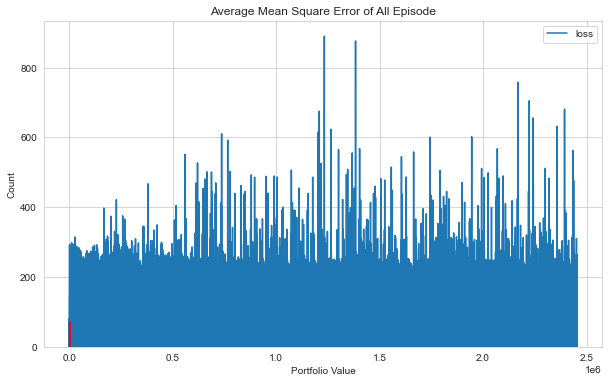

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

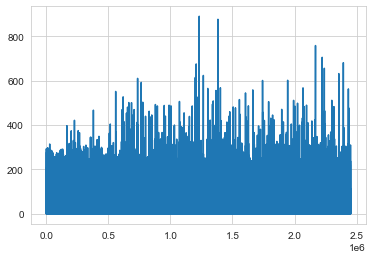

In [5]:
plt.plot(agent.model.losses)

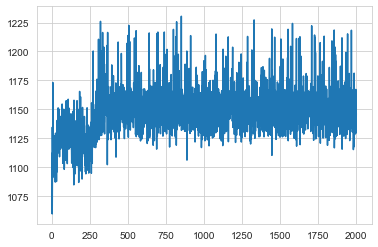

In [6]:
plt.plot(portfolio_value)

episode end value: 1097.70, duration: 0:00:00.066033
Sell: 55 times, Buy: 44 times


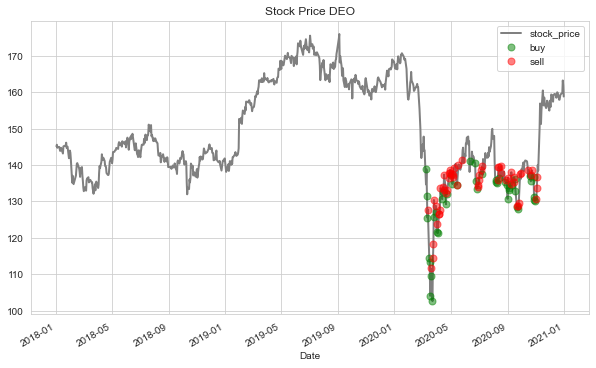

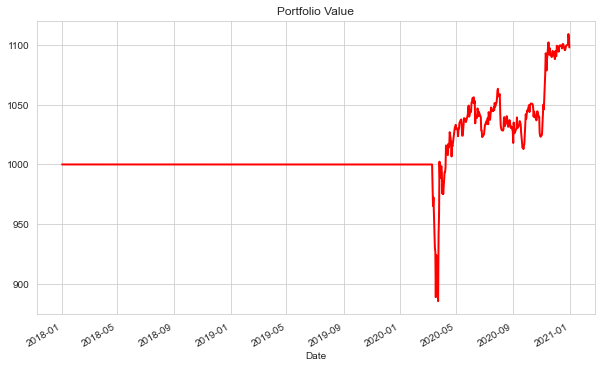

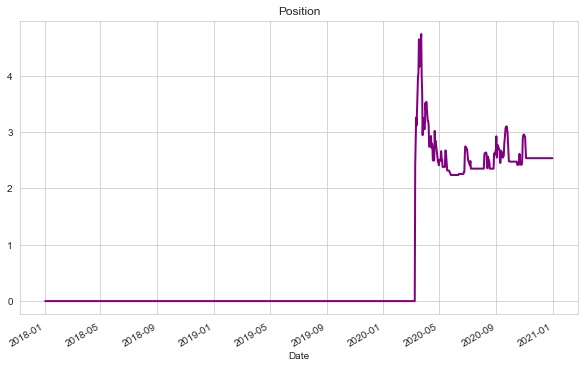

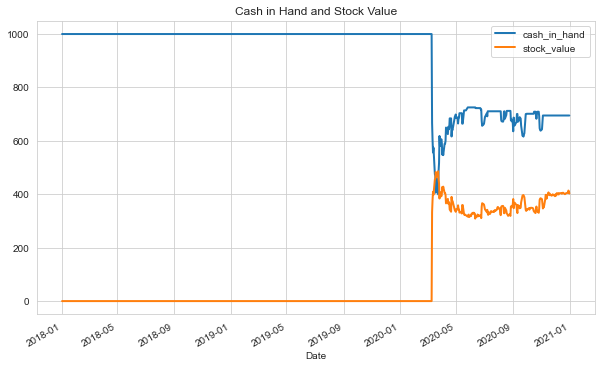

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DEO
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.16 %
Volatility: 0.0853
shape ratio: 0.2410
Maximun drawdown: -11.41 %
Calmar ratio: 0.2766
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.05 %
Volatility (benchmark): 0.2502
shape ratio: 0.0779
Maximun drawdown: -41.70 %
Calmar ratio (benchmark): 0.0731


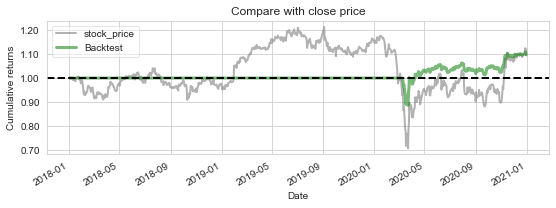

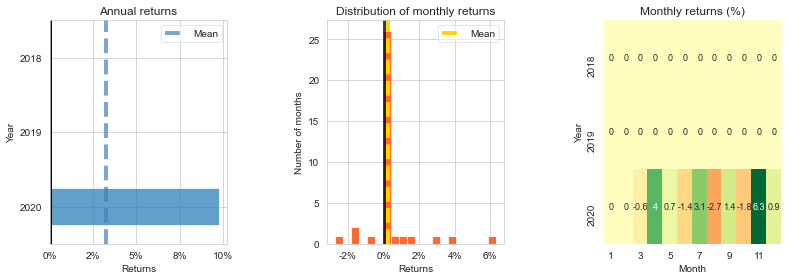

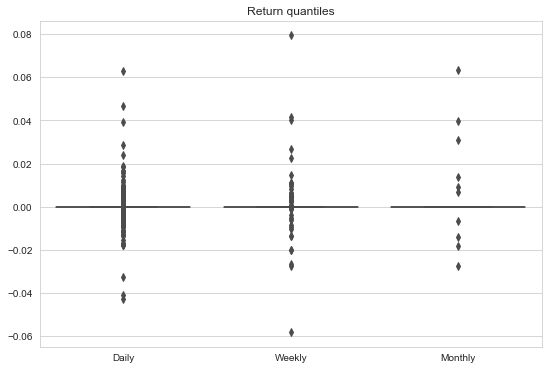

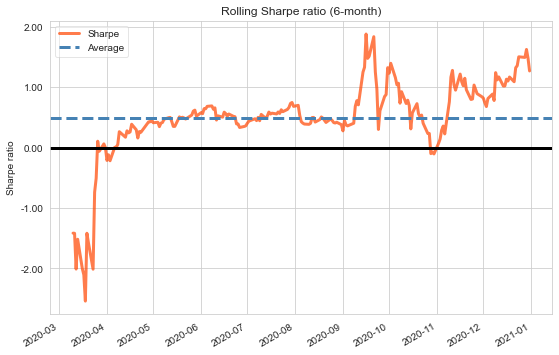

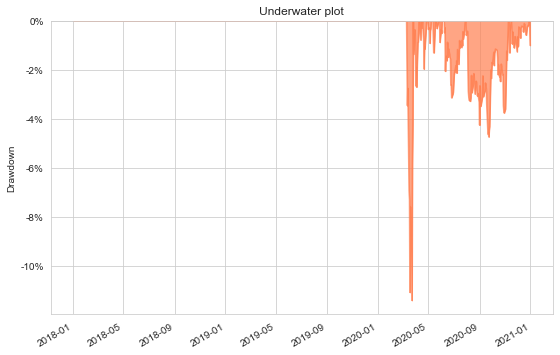

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')